In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('tiktok_top_1000_2".csv', index_col=0)
df.head()

,rank,account,subscribers_count,views_avg.,likes_avg.,comments_avg.,shares_avg.
0,1,billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0
1,2,badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0
2,3,chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0
3,4,charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0
4,5,yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0



Toma únicamente las variables de tipo numérico del dataset.
- Realiza un EDA explicando algunas de las cosas interesantes del conjunto de datos.
- Obtene la matriz de correlacion de las variables y estudia los resultados explicando las diferentes correlaciones con las variables.
- Limpia los datos de trabajo en caso de que sea necesario.
- Realiza el ajuste lineal múltiple mostrando las métricas.


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1000.0,500.500,2.888194e+02,1.0,250.75,500.5,750.25,1000.0
subscribers_count,1000.0,7049170.100,1.087267e+07,4300.0,1400000.00,3700000.0,8625000.00,135400000.0
views_avg.,1000.0,3700866.300,4.697164e+06,585300.0,1800000.00,2600000.0,4000000.00,95000000.0
likes_avg.,1000.0,453740.700,6.964760e+05,31000.0,230450.00,320200.0,478375.00,18100000.0
comments_avg.,1000.0,4559.051,7.766146e+03,0.0,1600.00,2800.0,4900.00,151000.0
shares_avg.,1000.0,10681.079,1.677724e+05,212.0,1200.00,2400.0,5400.00,5300000.0


In [4]:
df.stb.missing()

,missing,total,percent
rank,0,1000,0.0
account,0,1000,0.0
subscribers_count,0,1000,0.0
views_avg.,0,1000,0.0
likes_avg.,0,1000,0.0
comments_avg.,0,1000,0.0
shares_avg.,0,1000,0.0


In [5]:
df.dtypes

rank                   int64
account               object
subscribers_count    float64
views_avg.           float64
likes_avg.           float64
comments_avg.        float64
shares_avg.          float64
dtype: object

In [6]:
df_numericas = df.select_dtypes(include=np.number)

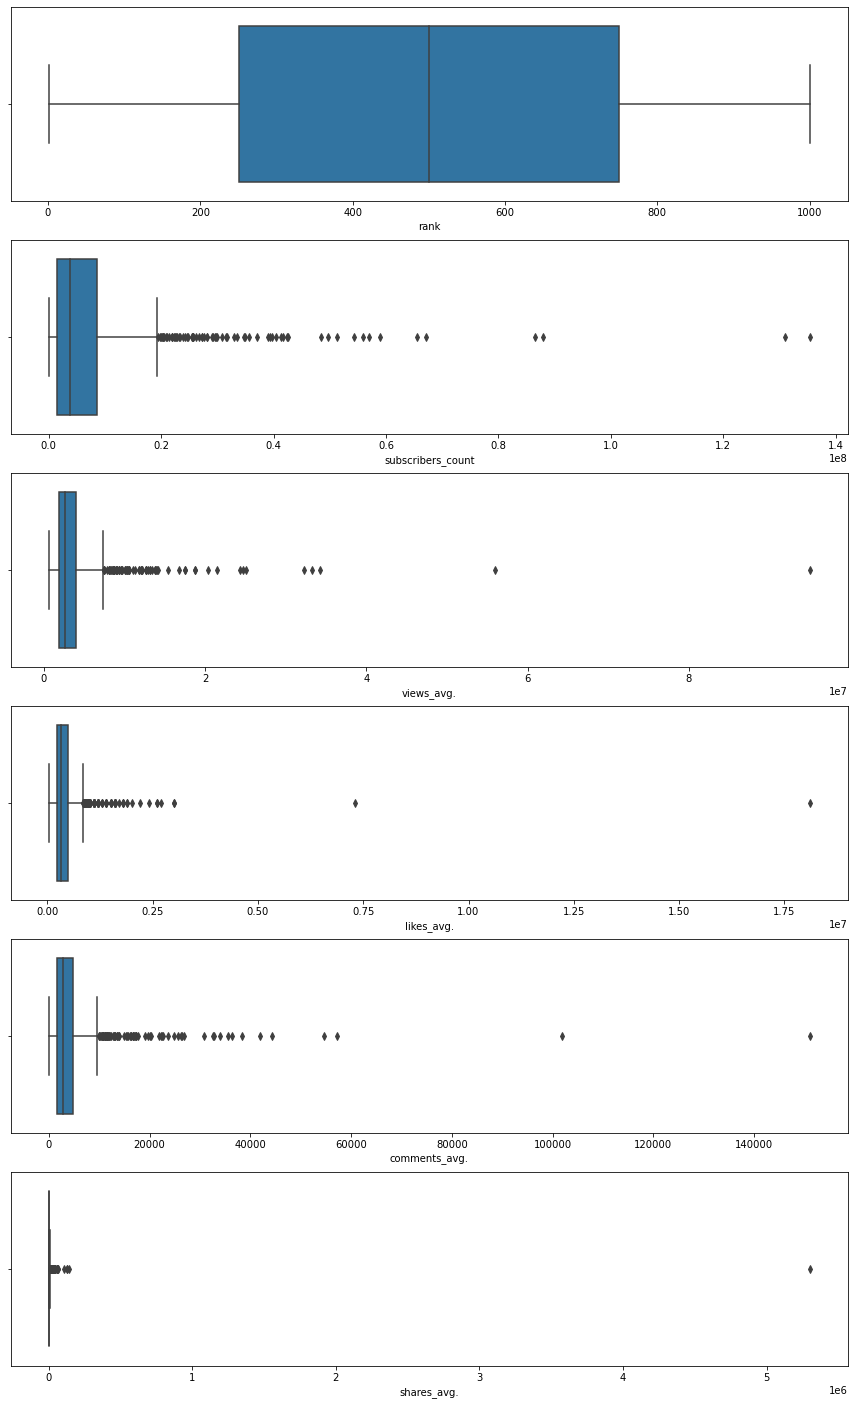

In [8]:
fig, axes = plt.subplots(6, 1, figsize=(15,25))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x = df_numericas.columns[i], data = df, ax=axes[i]); # para trazar una línea de densidad

plt.show()

    Vemos que nuestras columnas numéricas tienen outliers, pero como la naturaleza de nuestros datos son visualizaciones, 'likes', suscriptores... tiene sentido que mantengamos estos outliers porque influyen en nuestras variables dependientes.

In [ ]:
#sns.pairplot(df_numericas)

In [10]:
df_numericas.corr()

,rank,subscribers_count,views_avg.,likes_avg.,comments_avg.,shares_avg.
rank,1.000000,-0.170179,-0.426099,-0.389007,-0.379762,-0.072801
subscribers_count,-0.170179,1.000000,0.245177,0.245597,0.207978,-0.018577
views_avg.,-0.426099,0.245177,1.000000,0.788605,0.613921,-0.000647
likes_avg.,-0.389007,0.245597,0.788605,1.000000,0.807356,0.005877
comments_avg.,-0.379762,0.207978,0.613921,0.807356,1.000000,0.024031
shares_avg.,-0.072801,-0.018577,-0.000647,0.005877,0.024031,1.000000


    Vemos que en el DF todas las variables tienen alguna relación, porque ninguna es = 0. Pero, sin embargo, la mayoría tienen poca relación, exceptuando algunas como 'comments_avg' con 'likes_avg'(que tienen una correlación fuerte positiva porque es más de 0.8) o 'likes_avg' con 'views_avg'(tienen correlación positiva moderada porque es más de 0.6).

<AxesSubplot:>

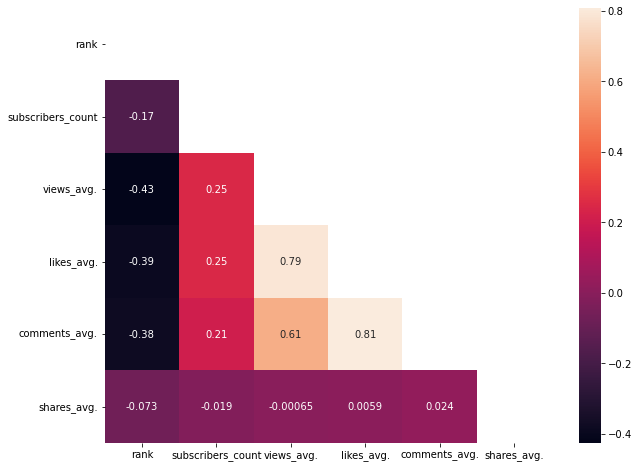

In [11]:
fig, ax = plt.subplots(figsize = (10,8))
corr = df_numericas.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask = mask,xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot= True )

    Con este mapa de calor reforzamos lo explicado anteriormente. Vemos que los colores más claros que son las relaciones más fuertes, son escasos.

Toma ahora el dataset incluyendo las variables categóricas.
- Realiza el EDA de las variables categóricas que se va a incluir en el modelo.
- Utiliza algun tipo de codificación para las variables numéricas.
- Realiza la misma limpieza de datos, en caso necesario, aplicada en el dataset del apartado para dejar las variables numéricas limpias.
- Obten el ajuste lineal múltiple incluyendo las variables categóricas


Compara las métricas obtenido del ajuste con las variables numéricas y con el modelo que incluía las variables categóricas. Explica los resultados obtenidos, pensando en posibles explicaciones.